In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
# Importing the dataset as time series
series = Series.from_csv('passengers.csv', header=0)
series.plot()


/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


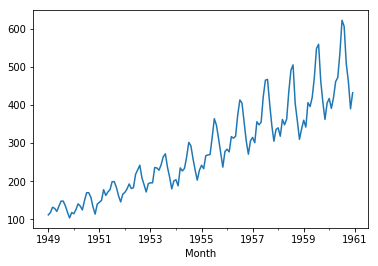

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
# Importing the dataset as time series
series = Series.from_csv('passengers.csv', header=0)
series.plot()


In [4]:
#highlight trivial patterns like trend and seasonalities

def test_stationarity(series): 
#take the mean and variance of the last 12 months ti compute moving average and moving variance
   mov_ave=series.rolling(12).mean()
   mov_std = series.rolling(12).std()

#Plot moving average and moving variance to visulaise trend and seasonality
   plt.plot(series, color='black',label='original_ts')
   plt.plot(mov_ave, color='red', label='Moving average')
   plt.plot(mov_std, color='blue', label = 'Moving std')
   plt.title('moving average and std')
   plt.legend(loc='best')
   #test stationarity with  Dickey-Fuller test:
   from statsmodels.tsa.stattools import adfuller
   df_test = adfuller(series, autolag='AIC')
   df_output = Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
   for key,value in df_test[4].items():
      df_output['Critical Value (%s)'%key] = value
   print(df_output)   


Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


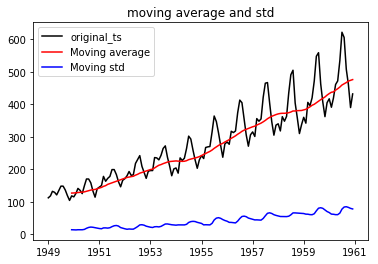

In [5]:
test_stationarity(series)
#output interprtation of df_output: mean is  growing with time so non-stationaryis obvious.
# Also p-values is greater than 0.05

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


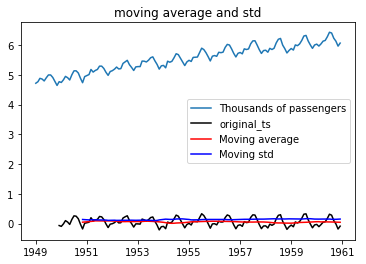

In [6]:
# taking out non-stationarity: as following steps:
#first apply log transform to reduce high values
series_log = np.log(series)
plt.plot(series_log)     # we can see the trend
mov_mean_log=series_log.rolling(12).mean()
#plt.plot(series_log)
#plt.plot(mov_mean_log, color='red')

#take away moving average from the series
series_log_mov_avg_diff = series_log - mov_mean_log
# series_log_mov_avg_diff contains nan: drop nan
series_log_mov_avg_diff.dropna(inplace=True)
#Plot moving average and moving variance to visulaise trend and seasonality
test_stationarity(series_log_mov_avg_diff)
# p-value less than 0.02 so this series is stationary

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


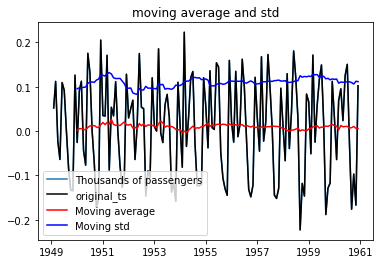

In [7]:
# now takes stationaity
series_log_diff = series_log - series_log.shift()
plt.plot(series_log_diff)
series_log_diff.dropna(inplace=True)
test_stationarity(series_log_diff)
# DF test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence.


Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


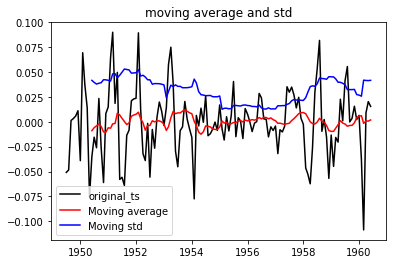

In [8]:
#take test decomposition too
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(series_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

series_log_decompose = residual
series_log_decompose.dropna(inplace=True)
test_stationarity(series_log_decompose)

#P-value is lower than the 0.01 

In [9]:
#now Forecasting

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
# Importing the dataset 
dataset = pd.read_csv('passengers.csv', usecols=[1])
X = dataset.values
X = X.astype('float32')

# split into train and test sets
train_size = int(len(X) * 0.70)
test_size = len(X) - train_size
train, test = X[0:train_size,:], X[train_size:len(X),:]
print(len(train), len(test))
        
X_train = []
y_train = []#one step back
X_test = []
y_test = []
for i in range(len(train)-2):
    X_train.append(train[i:(i+1), 0])
    y_train.append(train[i+1, 0])
for i in range(len(test)-2):    
    X_test.append(test[i:(i+1), 0])
    y_test.append(test[i+1, 0])
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


100 44


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/200
 - 0s - loss: 25503.3736 - acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 22483.7846 - acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 19630.4149 - acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 17136.7546 - acc: 0.0000e+00
Epoch 5/200
 - 0s - loss: 14810.0986 - acc: 0.0000e+00
Epoch 6/200
 - 0s - loss: 12860.1079 - acc: 0.0000e+00
Epoch 7/200
 - 0s - loss: 10978.9943 - acc: 0.0000e+00
Epoch 8/200
 - 0s - loss: 9570.8482 - acc: 0.0000e+00
Epoch 9/200
 - 0s - loss: 8309.7527 - acc: 0.0000e+00
Epoch 10/200
 - 0s - loss: 7241.2919 - acc: 0.0000e+00
Epoch 11/200
 - 0s - loss: 6351.0712 - acc: 0.0000e+00
Epoch 12/200
 - 0s - loss: 5504.2829 - acc: 0.0000e+00
Epoch 13/200
 - 0s - loss: 4760.7213 - acc: 0.0000e+00
Epoch 14/200
 - 0s - loss: 4087.3872 - acc: 0.0000e+00
Epoch 15/200
 - 0s - loss: 3502.1953 - acc: 0.0000e+00
Epoch 16/200
 - 0s - loss: 3009.6852 - acc: 0.0000e+00
Epoch 17/200
 - 0s - loss: 2573.5088 - acc: 0.0000e+00
Epoch 18/200
 - 0s - loss: 2219.7921 - acc: 0.0000e+00
Epoch 19/200

 - 0s - loss: 562.1783 - acc: 0.0204
Epoch 162/200
 - 0s - loss: 560.1185 - acc: 0.0204
Epoch 163/200
 - 0s - loss: 560.2933 - acc: 0.0204
Epoch 164/200
 - 0s - loss: 562.7095 - acc: 0.0102
Epoch 165/200
 - 0s - loss: 560.3266 - acc: 0.0102
Epoch 166/200
 - 0s - loss: 558.6347 - acc: 0.0102
Epoch 167/200
 - 0s - loss: 558.2387 - acc: 0.0102
Epoch 168/200
 - 0s - loss: 558.8256 - acc: 0.0306
Epoch 169/200
 - 0s - loss: 559.8990 - acc: 0.0204
Epoch 170/200
 - 0s - loss: 559.4306 - acc: 0.0204
Epoch 171/200
 - 0s - loss: 559.9126 - acc: 0.0102
Epoch 172/200
 - 0s - loss: 557.7004 - acc: 0.0102
Epoch 173/200
 - 0s - loss: 560.1643 - acc: 0.0102
Epoch 174/200
 - 0s - loss: 559.0227 - acc: 0.0102
Epoch 175/200
 - 0s - loss: 558.8307 - acc: 0.0102
Epoch 176/200
 - 0s - loss: 561.2386 - acc: 0.0204
Epoch 177/200
 - 0s - loss: 558.7921 - acc: 0.0102
Epoch 178/200
 - 0s - loss: 559.9669 - acc: 0.0000e+00
Epoch 179/200
 - 0s - loss: 558.4655 - acc: 0.0102
Epoch 180/200
 - 0s - loss: 559.7418 - ac

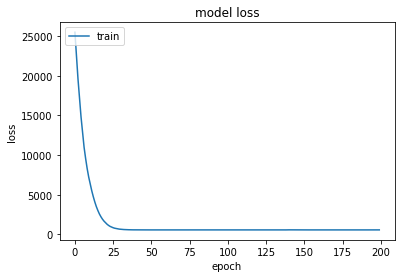

In [11]:
# Part 2 - Building the NN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error', metrics = ['accuracy'])  
history = model.fit(X_train, y_train, epochs=200, batch_size=12, verbose=2)
# list all data in history
print(history.history.keys())
# summarize history for loss
#fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
plt.plot(history.history['loss'])
#axs[0].set_ylim([400, 2500])
#plt.ylim(0,2500)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

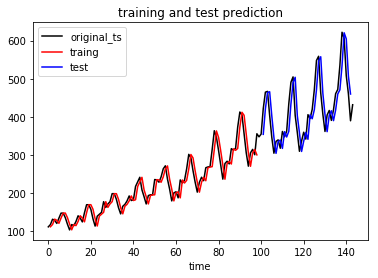

In [12]:
# generate predictions for training
predicted_X_train = model.predict(X_train)
predicted_X_test = model.predict(X_test)

# shift train and test predictions for plotting them on top of original data
predicted_X_train_plot=np.tile(np.nan, (len(X), 1))
predicted_X_train_plot[1:len(predicted_X_train)+1, :] = predicted_X_train
predicted_X_test_plot=np.tile(np.nan, (len(X), 1))
predicted_X_test_plot[len(predicted_X_train)+(1*2)+1:len(X)-1, :] = predicted_X_test

# plot baseline and predictions
#axs[1,].plot(X)
#axs[1].plot(predicted_X_train_plot)
#axs[1].plot(predicted_X_test_plot)
#axs[1].set_ylim([0, 700])

plt.plot(X,color='black',label='original_ts')
plt.plot(predicted_X_train_plot,color='red', label='traing')
plt.plot(predicted_X_test_plot,color='blue', label = 'test')
plt.title('training and test prediction')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()


In [ ]:
# Part 3 - Evaluating, Improving and Tuning the ANN

# Evaluating the NN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_model():
    model = Sequential()
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error', metrics = ['accuracy'])  
    return model
model = KerasClassifier(build_fn = build_model, batch_size = 2, epochs = 200)
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()


Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
